In [1]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from string import punctuation

In [2]:
# Read the data from CSV files

import pandas as pd 


data_positive=pd.read_csv('pos_tweets.csv')
data_negative=pd.read_csv('neg_tweets.csv')

In [3]:
# Create balanced dataset

import numpy as np


sample_size = min(data_positive.shape[0], data_negative.shape[0])
raw_data = np.concatenate((data_positive['tweets'].values[:sample_size], 
                           data_negative['tweets'].values[:sample_size])) 
labels = [1]*sample_size + [0]*sample_size

In [4]:
#Preprocessing data
import re


def clean_tweets(tweet):
    user_removed = re.sub(r'@[A-Za-z0-9]+','',tweet)
    link_removed = re.sub('https?://[A-Za-z0-9./]+','',user_removed)
    number_removed = re.sub('[^a-zA-Z]', ' ', link_removed)
    lower_case_tweet= number_removed.lower()
    tok = WordPunctTokenizer()
    words = tok.tokenize(lower_case_tweet)
    clean_tweet = (' '.join(words)).strip()
    return clean_tweet


data = [clean_tweets(t) for t in raw_data]


In [5]:
data_positive["Cleaned_tweets"]=data_positive["tweets"].apply(lambda x: clean_tweets(x))
data_negative["Cleaned_tweets"]=data_negative["tweets"].apply(lambda x: clean_tweets(x))
data_positive['sentiment']="positive"
data_negative['sentiment']='negative'

In [6]:
data_positive.head(6)

,tweets,Cleaned_tweets,sentiment
0,""" just watched the movie Wanted... it was pret...",just watched the movie wanted it was pretty da...,positive
1,""" now I'm happy """,now i m happy,positive
2,"""--plotting like i'm mike..'game plan:pass the...",plotting like i m mike game plan pass the ball...,positive
3,"""@ mcdonalds with my litto sis aka cuzin lol c...",mcdonalds with my litto sis aka cuzin lol cris...,positive
4,"""@ PBnJen : Thanks for the great tour and maki...",pbnjen thanks for the great tour and making me...,positive
5,"""@_Chelsea_Marie does target ship things to lo...",chelsea marie does target ship things to londo...,positive


In [7]:
data_negative.head(6)

,tweets,Cleaned_tweets,sentiment
0,""" cavs lost, and I got this sinking feeling we...",cavs lost and i got this sinking feeling we ar...,negative
1,""" the closest BGT tour is Cardiff or London da...",the closest bgt tour is cardiff or london dam ...,negative
2,""" Why do other pet care people try to run othe...",why do other pet care people try to run others...,negative
3,"""-gasps- dananananaykroyd touring aussie .... ...",gasps dananananaykroyd touring aussie grrr why...,negative
4,"""....If i am going warsal that means no church...",if i am going warsal that means no church in t...,negative
5,"""....wow the CAVS are sleeping ! I hate these ...",wow the cavs are sleeping i hate these blowout...,negative


In [8]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(words)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Positive words


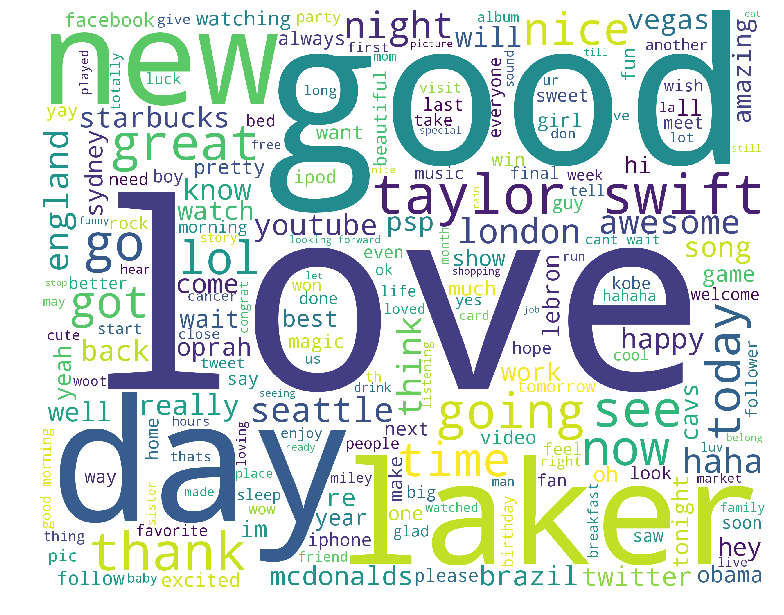

Negative words


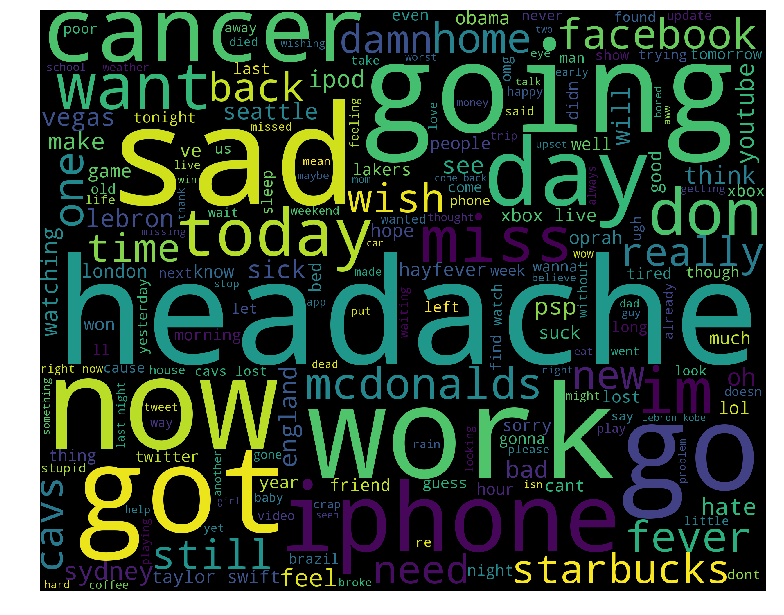

In [9]:
print("Positive words")
wordcloud_draw(data_positive["Cleaned_tweets"],'white')
print("Negative words")
wordcloud_draw(data_negative["Cleaned_tweets"])

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv=TfidfVectorizer(sublinear_tf=True, stop_words = "english") 
features=tfv.fit_transform(data)

In [11]:
classifiers=["naive_bayes","logistic_regression"]
for classifier in classifiers:
    if classifier == "logistic_regression": 
        from sklearn.linear_model import LogisticRegression
        model = LogisticRegression(C=1.,solver="lbfgs")
    elif classifier == "naive_bayes": 
        from sklearn.naive_bayes import MultinomialNB
        model = MultinomialNB()
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.25, random_state=0)
    model.fit(x_train, y_train)
    print("the accuracy of the classifier %s is :"%(classifier),model.score(x_test,y_test))
    
    

the accuracy of the classifier naive_bayes is : 0.8051948051948052
the accuracy of the classifier logistic_regression is : 0.7954545454545454
